# Øvelse 4 - Michaelis-Menten 

***

Se worddokument i canvas for dypere forklaringer om Michaelis-Menten og hvilke antagelser som trekkes for at ligningen skal være gyldig. For å se nærmere på hvordan vi kan bedømme kinetiske parametere som Km og Vmax på ulike måter, skal dere jobbe dere gjennom dette arbeidsarket og løse oppgavene. For å bedømme Km og Vmax med ulike metoder, skal vi bruke programmeringsspråket Python for å gjennomføre de nødvendige beregningene. Ved å bruke Python har vi bedre kontroll over databehandlingen, men det krever at vi må spesifisere hva vi ønsker å oppnå med kode. Som en innføring til Python og programmering benytter vi oss av Jupyter Notebook som verktøy, her kan vi skrive både kode og tekst, og alle stegene dere skal gjennomføre har forklarende tekst som skal sørge for at dere forstår hva som blir gjort. Ved bruk av Python skal vi bedømme Km og Vmax med tre vanlige metoder: 

1. Bedømme Km og Vmax visuelt
2. Bedømme Km og Vmax med kurvetilpassning 
3. Bedømme Km og Vmax ved bruk av Lineweaver-Burke plot

Når dere løser oppgavene nedover i dette arbeidsarket, tenk over hva dere gjør og hvordan dette påvirker troverdigheten til Km og Vmax resultatene. Hvis de eksperimentelle dataene deres ikke er gode nok til å hente ut Km og Vmax, så kan dere låne resultater fra en annen gruppe. 


***


## Programmering 

***

Python som programmeringsspråk er en av de enklere språkene og det er designet for å være brukervennlig. Jeg anbefaler at dere lærer dere Python, dette er ikke et krav for kurset eller relevant for eksamen, men kun en personlig anbefaling. I programmeringsspråk benytter vi oss av en bestemt syntax, som kan sammenlignes med grammatikk i norsk faget. For å gi dere en innføring til Python og hva det kan brukes til så har jeg skrevet all koden for dere og dere skal ikke skrive noe selv. For å hjelpe dere med å forstå litt om Python syntax, defineres noen sentrale elementer her:

* '=' tegnet brukes til å definere en variabel, vi lagrer hva som er til høyre for tegnet i variablen definert på venstre side
   * Variabler kan være int, string, float som betyr heltall, bokstaver eller desimaler 
* 'navn()' viser til en funksjon som gjør en oppgave, mens det inne i parantesen er argumenter som trengs for å gjennomføre        oppgaven 
* I Python teller vi fra 0, så første kolonne/rad vil være 0
* `Print()` vil sende teksten innenfor parantesene til konsolen


Python er et Open Source språk som betyr at informasjonen tilhørende koden er gratis tilgjengelig og det finnes derfor store ressurser på internett tilgjengelig for alle. Disse ressursene er som oftest kolleksjoner av kode som kan brukes av flere. Vi kan bruke `import` for å hente inn kolleksjoner med kode som vi kan benytte oss av. Ved å importere andre sin kode trenger vi ikke å skrive alt selv, dette er også en av fordelene ved Python.


***

In [97]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Metode 1: Bedømme Km og Vmax visuelt 

Ved å bedømme Km og Vmax visuelt, så ser vi på grafen av v mot [S] og bestemmer en horisontal linje som går parallellt med den hyperbole kurven (Vmax). Nedover i metode 1 skal dere endre på Vmax verdien slik at den ligger parallellt med de eksperimentelle resultatene deres. Når dere har bestemt Vmax, så kan dere gå videre å bestemme Km som substratkonsentrasjonen ved Vmax/2.

***

Obs! Hvis dere bruker norsk språk på Excel, så bytt `data = pd.read_csv(fil, header = None, skiprows = 1)` med
`data = pd.read_csv(fil, header = None, skiprows = 1, delimiter = ';')`

***

In [146]:
fil = open('6.4.csv','r')                              
data = pd.read_csv(fil, header = None, delimiter=',')   
                                                      
S = (data[0])                                         
v = (data[1])                                              

***

Det første vi gjør her er å bruke funksjonen `open()` til å åpne filen Data.csv og jeg spesifiserer til Python at filen skal kun leses (r). Deretter lagres informasjonen i variablen 'fil' som nå inneholder all informasjonen fra CSV filen deres, men for å bearbeide resultatene våre videre er det enklere å ha ett datasett som kun består av tall. Vi må dermed fjerne kolonnenavnene som kan gjøres ved å lage en ny variabel 'data' som vi bruker funksjonen `pd.read_csv()` for å lese inn dataen vår (fil). I argumentene kan vi spesifisere at det ikke skal være kolonnenavn med `header = None` og vi forteller Python at de skal hoppe over første linje med `skiprows = 1`, da fjernes kolonnenavnene dere la inn i .csv filen.

Deretter lager vi nye variabler S og v med å hente ut dataen fra første og andre kolonne (0, 1) for å se på datasettet i konsolen ved å bruke `print(data)` 


***

In [147]:
print(data)

      0         1
0  0.04  0.910714
1  0.08  1.558929
2  0.16  2.212500
3  0.80  4.258929
4  1.60  4.530000


***
Etter at vi har sett at datasettet er blitt lest inn riktig, ønsker vi å visualisere den ved bruk av en graf. I Python kan dette gjøres på flere måter, men her skal vi bruke pakken `plt.`. 

##### Oppgave 1.1: Gjør om på Vmax variablen for å lage en horisontal linje som skal ligge parallellt med dataplatået. 



***


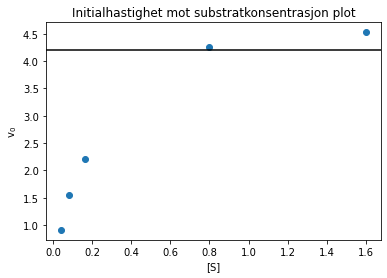

In [148]:
plt.scatter(S,v)
plt.title('Initialhastighet mot substratkonsentrasjon plot')
plt.xlabel('[S]')
plt.ylabel('v$_0$')

Vmax = 4.2


plt.axhline(Vmax, color = 'black')



In [149]:
print(('Ved å visuelt bedømme grafen er Vmax:{}').format(Vmax))

Ved å visuelt bedømme grafen er Vmax:4.2


***

Etter at vi har bestemt Vmax kan vi bestemme Km som er substratkonsentrasjonen ved Vmax/2. I grafen over vil det være vanskelig å bestemme Km. Vi kan derfor endre litt på figuraksene for å forstørre området hvor Km skal bestemmes, Python gir oss bedre kontroll, men det krever at vi spesifiserer det gjennom kode. 

For å se nærmere på området hvor Km skal bestemmes kan vi endre på x-aksen ved å bruke `plt.xlim()` funksjonen som mottar start og slutt verdiene som argument. Disse verdiene kan dere endre på om dere ønsker det. 

I tillegg ser vi at tallene begynner å bli små, for å lage et mer oversiktlig bilde bruker jeg funksjonen `plt.ticklabel_format()` hvor vi spesifiserer at vi vil endre begge aksene, og stilen skal være `sci` som er scientific feks. (1e04). Deretter forteller vi at begge aksene skal begynne på 0. 

##### Oppgave 1.2: Gjør om på Km variablen for å lage ett kryss med Vmax/2 (Horisontal linje) 


***

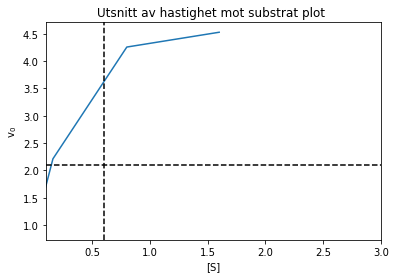

In [150]:
plt.plot(S,v)
plt.title('Utsnitt av hastighet mot substrat plot ')
plt.xlabel('[S]')
plt.ylabel('v$_0$')
plt.xlim(0.1,3)




Vmax_halve = Vmax/2

Km = 0.6


plt.axhline(Vmax_halve, color = 'black', linestyle = '--')
plt.axvline(Km, color = 'black', linestyle = '--' )



In [151]:
print(( 'Ved å visuelt bedømme grafen er Vmax:{} og Km:{}').format(Vmax, Km))

Ved å visuelt bedømme grafen er Vmax:4.2 og Km:0.6


### Metode 2: Bedømme Km og Vmax med kurvetilpassning

For å bedømme Km og Vmax med kurvetilpassning bruker vi Michaelis-Menten funksjonen $v = Vmax[S]/Km + [S]$ til å beregne Km og Vmax verdier som passer de eksperimentelle resultatene best. Dette gjøres ved å gjennomføre en minstekvadratersmetode for hvert punkt. Datakolleksjoner for kurvetilpassning er tilgjengelig og vi benytter oss av importerte pakker.  

***

For å gjennomføre en kurvetilpassning av det eksperimentelle datsettet, benytter vi oss av en pakke `curve_fit` som inneholder en metode for å kurvetilpasse. Her gjennomfører vi en ikke-lineær minstekvadratersmetode, men for at denne pakken skal kunne gjennomføre oppgaven må vi oppgi den funksjonen vi ønsker å kurvetilpasse resultatene til. I Python syntax definerer vi en funksjon med ordet `def` og deretter navnet på den definerte funksjonen. I vårt tilfelle blir dette `def Michaelis_Menten_Funksjonen()`. Videre så spesifiserer vi argumentene som er substratkonsentrasjonene (S) og variabelene Km og Vmax. 

Slik som pakken er laget vil resultatet av fuksjonen være to variabler som er `Km_og_Vmax` variablen som vil inneholde kurvetilpasset Km og Vmax verdiene og `cov` variablen som er en statistisk beregning som vi ikke skal diskutere her og dere kan se bort i fra den.

***

In [152]:
def Michaelis_Menten_Funksjonen(S, km, vmax):
        return((km*S)/((vmax+S)))


Km_og_Vmax, cov = curve_fit(f = Michaelis_Menten_Funksjonen, xdata = S,ydata = v)



***

Nå som vi har definert Michaelis-Menten funksjonen kan vi tegne den inn på figuren sammen med det eksperimentelle datasettet. I koden over definerte vi Km og Vmax ved kurvetilpassing, men for å vise det grafisk som en helttrukket linje må vi lage et sett med teoretisk data som følger den eksperimentelle. Vi kaller de teoretiske datasettene `xModel` og `yModel` og det er disse verdiene som lar oss trekke en heltrukket linje i figuren. 

Måten vi lager disse teoretiske datasettene på er å gi Michaelis-Menten funksjonen alle substratkonsentrasjoner fra den laveste `min(S)` til den høyeste `max(S)` og ved bruk av funksjonen `np.linspace()` fyller vi inn alle de manglende substratkonsentrasjonene. Deretter kan vi hente ut alle de tilsvarende hastighetene (v) for substratkonsentrasjonene mellom de laveste og høyeste verdiene i det eksperimentelle datasettet.  


***

In [153]:
xModel = np.linspace(min(S), max(S))
yModel = Michaelis_Menten_Funksjonen(xModel, *Km_og_Vmax)

##### Oppgave 2.1: Prøv å kurvetilpasse datasettet deres og noterer Km og Vmax, om det ikke går så hopper dere over denne. 

Text(0, 0.5, 'v$_0$')

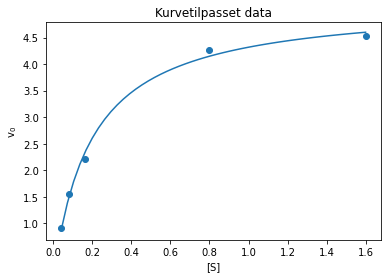

In [154]:
plt.plot(xModel, yModel)
plt.scatter(S,v)
plt.title('Kurvetilpasset data')
plt.xlabel('[S]')
plt.ylabel('v$_0$')


In [155]:
print(Km_og_Vmax)

Vmax, Km = Km_og_Vmax
print(('Ved bruk av kurvetilpassning er Vmax:{} og Km:{}').format(Vmax, Km))


[5.16039142 0.19524451]
Ved bruk av kurvetilpassning er Vmax:5.16039142322685 og Km:0.1952445092270105


### Metode 3: Bedømme Km og Vmax med Lineweaver-Burke 

Lineweaver-Burke er en linearisering av den hyperbole Michaelis-Menten funksjonen til en lineær funksjon, dette gjøres ved å gjennomføre en resiprokal av Michaelis-Menten funksjonen. Vi kan ved bruk av denne metoden bestemme Vmax fra y-akseen og Km fra stigningstallet.  



***

Når vi skal gjøre om på de eksperimentelle resultatene fra S og v til 1/S og 1/v, så må vi fjerne 0 fra filene fordi 1/0 går ikke. Først så printer vi ut dataen for å se på den igjen.

***

In [156]:
print(data)

      0         1
0  0.04  0.910714
1  0.08  1.558929
2  0.16  2.212500
3  0.80  4.258929
4  1.60  4.530000


***

Vi kan be Python gjennomføre 1/x for alle tallene med unntak av den første raden. Det kan vi gjøre ved å kun lese inn fra den andre raden (husk at python teller fra 0) `1/data[kolonne][1:]`. Vi har nå løst problemet med å ha 0 i datasettet, men for å benytte oss av pakken `LinearRegression()` som skal gjennomføre lineærregresjonen må datasettet gjøres om til det formatet som pakken godtar. Resten av koden under gjennomfører en transposisjon av resultatene. 
***

In [157]:
ENoverS = np.array((1/data[0][1:])).reshape(-1,1)
ENoverv = np.array((1/data[1][1:])).reshape(-1,1)



print(ENoverS,ENoverv)

[[12.5  ]
 [ 6.25 ]
 [ 1.25 ]
 [ 0.625]] [[0.64146621]
 [0.4519774 ]
 [0.23480084]
 [0.22075055]]


***

På lik måte som ved kurvetilpassingen bruker vi en pakke for å gjøre lineærregresjonen. Den benytter seg av en lineær minstekvadratersmetode for å lage en teoretisk heltrukketlinje på $y = ax+b$ formatet som best passer de eksperimentelle dataene. 

***

Text(0, 0.5, '1/v$_0$')

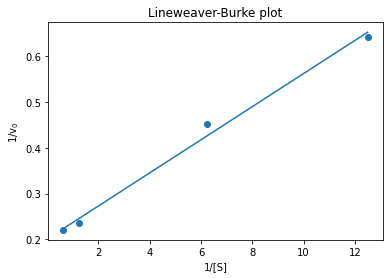

In [158]:
plt.scatter(ENoverS,ENoverv)
lineærRegresjon = LinearRegression()
lineærRegresjon.fit(ENoverS,ENoverv)
Predikert_data = lineærRegresjon.predict(ENoverS)

plt.plot(ENoverS, Predikert_data)
plt.title('Lineweaver-Burke plot')
plt.xlabel('1/[S]')
plt.ylabel('1/v$_0$')

***

##### Øppgave 3.1: Gjennomfør lineærregresjonen av datasettet deres og notere Vmax og Km verdier. 

***

In [159]:
y_skjæringspunkt = lineærRegresjon.intercept_
stigningstall = lineærRegresjon.coef_



Vmax = 1/y_skjæringspunkt
Km = Vmax*stigningstall

print(('Ved bruk av Lineweaver-Burke er Vmax:{} og Km:{}').format(Vmax, Km))

Ved bruk av Lineweaver-Burke er Vmax:[4.98019126] og Km:[[0.18008685]]
